### Loading all the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### [Reading the CSV file](/edit/who_suicide_statistics.csv)

In [2]:
data = pd.read_csv('../input/who-suicide-statistics/who_suicide_statistics.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
# Checking for the total data points
data.shape

(43776, 6)

In [5]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [6]:
# Checking for any null values 
data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

## Sorting the dataframe in ascending order according to year

In [7]:
data = data.sort_values(['year'],ascending=True)
data.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


### Finding the number of unique countries in the dataset

In [8]:
print("Number of unique countries :" , data['country'].nunique())

Number of unique countries : 141


### Since we have a large dataset, we can drop the rows which have null values for suicide_no and population colums

In [9]:
# Checking for the total data points
# after dropping the null rows 
data.dropna(inplace = True)
data.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [10]:
data.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
26469,Netherlands,1979,male,5-14 years,3.0,1191200.0
27084,New Zealand,1979,female,15-24 years,11.0,281500.0


### Lets see the top 10 countries having the most suicides over the years

In [11]:
data[['country','suicides_no']].groupby(['country']).agg('sum').sort_values(by='suicides_no',ascending=False).head(10)

,suicides_no
country,
Russian Federation,1500992.0
United States of America,1201401.0
Japan,937614.0
France,395500.0
Ukraine,365170.0
Germany,291262.0
Republic of Korea,261730.0
Brazil,250824.0
Poland,172562.0


### Lets look at these 10 countries graphically

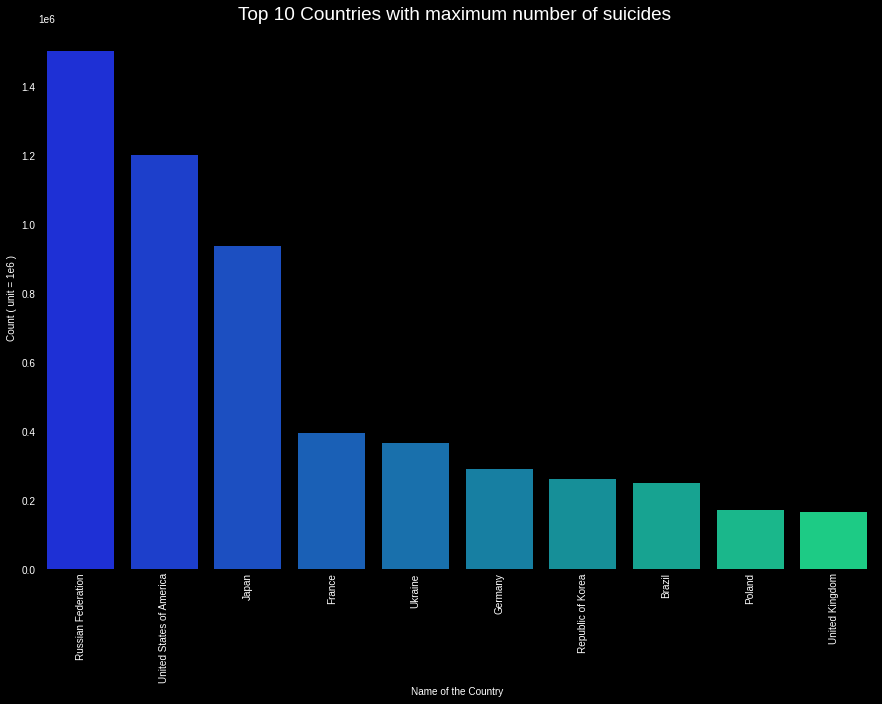

In [12]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 10)

xval = pd.DataFrame(data.groupby(['country'])['suicides_no'].sum().reset_index())
xval.sort_values(by = ['suicides_no'], ascending = False, inplace = True)

sns.barplot(xval['country'].head(10),y = xval['suicides_no'].head(10), data= xval, palette = 'winter')
plt.title('Top 10 Countries with maximum number of suicides ', fontsize = 19)
plt.xlabel('Name of the Country')
plt.xticks(rotation = 90)
plt.ylabel('Count ( unit = 1e6 )')
plt.rcParams['font.size'] = 19
plt.show()

### Lets see the top 10 countries with minimum suicides over the years

In [13]:
data[['country','suicides_no']].groupby(['country']).agg('sum').sort_values(by='suicides_no',ascending=True).head(10)

,suicides_no
country,
Cayman Islands,0.0
Saint Kitts and Nevis,0.0
Dominica,4.0
Sao Tome and Principe,4.0
Mayotte,6.0
Bermuda,6.0
Antigua and Barbuda,11.0
Maldives,20.0
San Marino,21.0


### Lets look at these 10 countries graphically

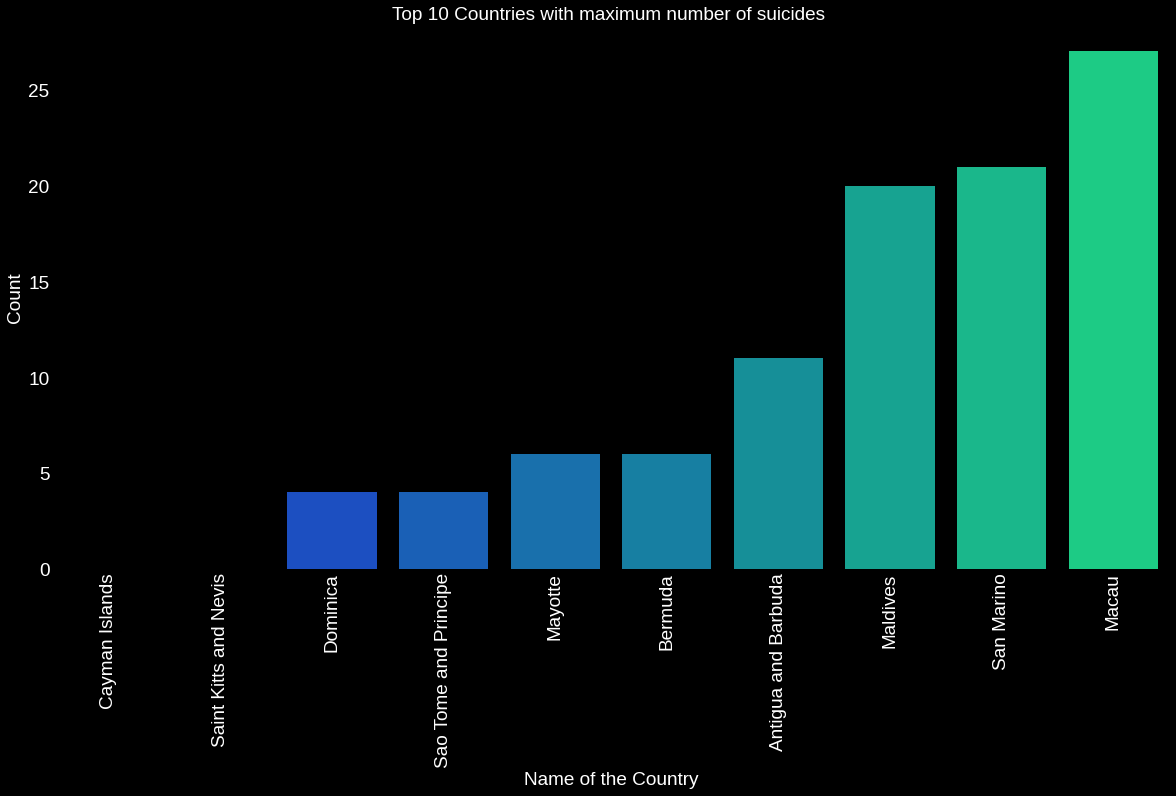

In [14]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 10)

xval = pd.DataFrame(data.groupby(['country'])['suicides_no'].sum().reset_index())
xval.sort_values(by = ['suicides_no'], ascending = True, inplace = True)

sns.barplot(xval['country'].head(10),y = xval['suicides_no'].head(10), data= xval, palette = 'winter')
plt.title('Top 10 Countries with maximum number of suicides ', fontsize = 19)
plt.xlabel('Name of the Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.rcParams['font.size'] = 19
plt.show()

### Top 10 years with most number of Suicides in 141 countries

In [15]:
xvals = data[['year','suicides_no']].groupby('year').agg('sum').sort_values(by='suicides_no',ascending=False)
xvals.head(10)

,suicides_no
year,
2002,259376.0
2003,259336.0
1999,258989.0
2000,258808.0
2001,254036.0
1998,252324.0
1996,249451.0
2009,246323.0
1995,245203.0


### Total population of countries having the most suicides

In [16]:
data[['population','suicides_no','year']].groupby('year').agg('sum').sort_values(by='suicides_no',ascending=False).head(10)

,population,suicides_no
year,,
2002,1.922587e+09,259376.0
2003,1.940607e+09,259336.0
1999,1.809551e+09,258989.0
2000,1.895363e+09,258808.0
2001,1.854263e+09,254036.0
1998,1.757836e+09,252324.0
1996,1.694326e+09,249451.0
2009,2.089017e+09,246323.0
1995,1.603185e+09,245203.0


### Finding the correlation coefficient between total suicides and total population

In [17]:
corr= data['suicides_no'].corr(data['population'])
print("Correlation between the number of suicides and population is :",corr)

Correlation between the number of suicides and population is : 0.6114060718995665


### Graphically representing the top 10 years having the most suicides

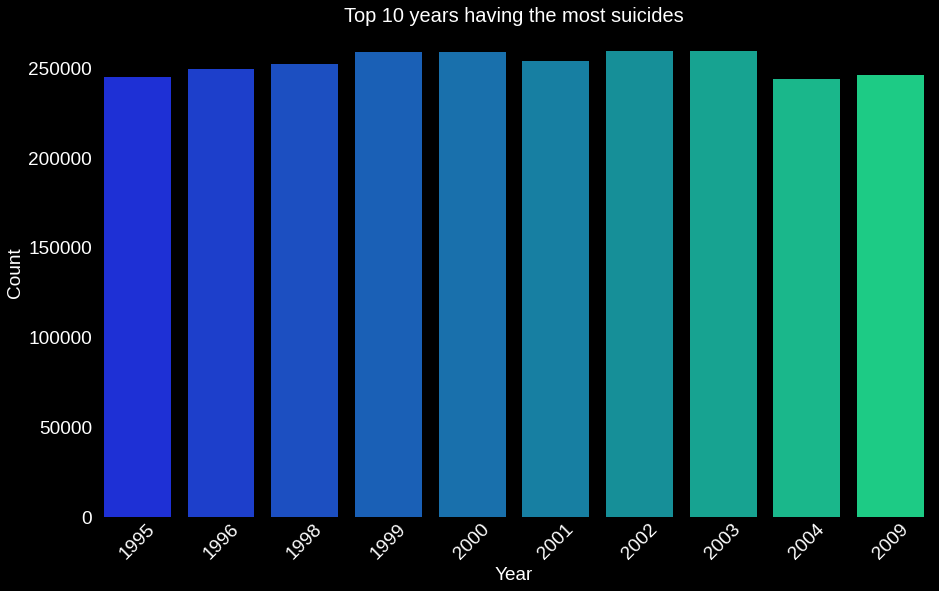

In [18]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 9)

xvals = pd.DataFrame(data.groupby(['year'])['suicides_no'].sum().reset_index())
xvals.sort_values(by = ['suicides_no'], ascending = False , inplace = True)

sns.barplot(x = "year", y = "suicides_no", data= xvals.head(10), palette = 'winter')
plt.title('Top 10 years having the most suicides', fontsize = 20)
plt.xlabel('Year')
plt.rcParams['font.size'] = 19
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

### Lets see the age groups having the most suicides

In [19]:
data[['age','suicides_no']].groupby('age').agg('sum').sort_values(by='suicides_no',ascending=False)

,suicides_no
age,
35-54 years,2887740.0
55-74 years,1955150.0
25-34 years,1360780.0
15-24 years,975700.0
75+ years,756777.0
5-14 years,62320.0


### Looking at the above data graphically


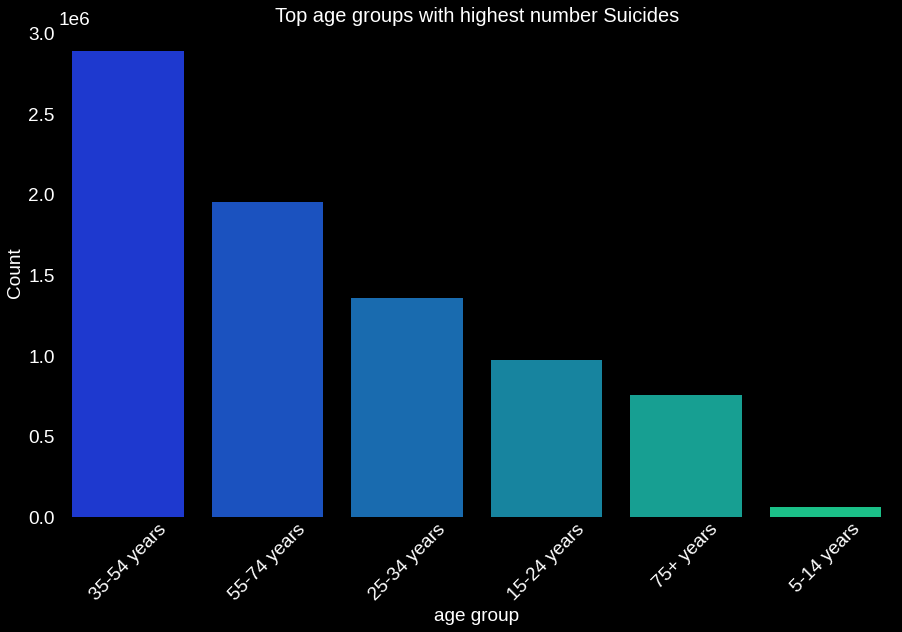

In [20]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')

x = pd.DataFrame(data.groupby(['age'])['suicides_no'].sum().reset_index())
x.sort_values(by = ['suicides_no'], ascending = False , inplace = True)

sns.barplot(x['age'].head(10), y = x['suicides_no'].head(10), data= x, palette = 'winter')
plt.title('Top age groups with highest number Suicides', fontsize = 20)
plt.xlabel('age group')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

### Looking at the number of suicides with respect to gender

In [21]:
data[['sex','suicides_no']].groupby('sex').agg('sum').sort_values(by='suicides_no')

,suicides_no
sex,
female,1894294.0
male,6104173.0


### Lets look at the above numbers graphically

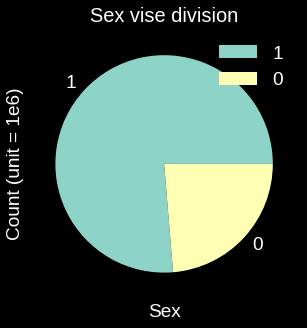

In [22]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (9,5)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(data.groupby(['sex'])['suicides_no'].sum().reset_index())
x.sort_values(by = ['suicides_no'], ascending = False , inplace = True)

# sns.pieplot(x['sex'], y = x['suicides_no'], data= x, palette = 'winter')
x.plot.pie(y ='suicides_no')
plt.title('Sex vise division', fontsize = 20)
plt.xlabel('Sex')
plt.ylabel('Count (unit = 1e6)')
plt.show()

### Copying the dataframe so that it can be used for the benchmark model.

In [23]:
bm_df = data.copy()

## Lets use the label encoder to :
- To encode to column sex and the column age to plot coorelation headtmap.

In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
bm_df['sex'] = LE.fit_transform(bm_df['sex'])
bm_df['age'] = LE.fit_transform(bm_df['age'])
bm_df['country'] = LE.fit_transform(bm_df['country'])
data['sex'] = LE.fit_transform(data['sex'])

In [25]:
bm_df.head()

,country,year,sex,age,suicides_no,population
6204,16,1979,0,0,385.0,12448100.0
26470,71,1979,1,4,217.0,1040500.0
26471,71,1979,1,5,93.0,235800.0
26469,71,1979,1,3,3.0,1191200.0
27084,72,1979,0,0,11.0,281500.0


In [26]:
bm_df.shape

(36060, 6)

## Plotting the Coorelation Heatmap

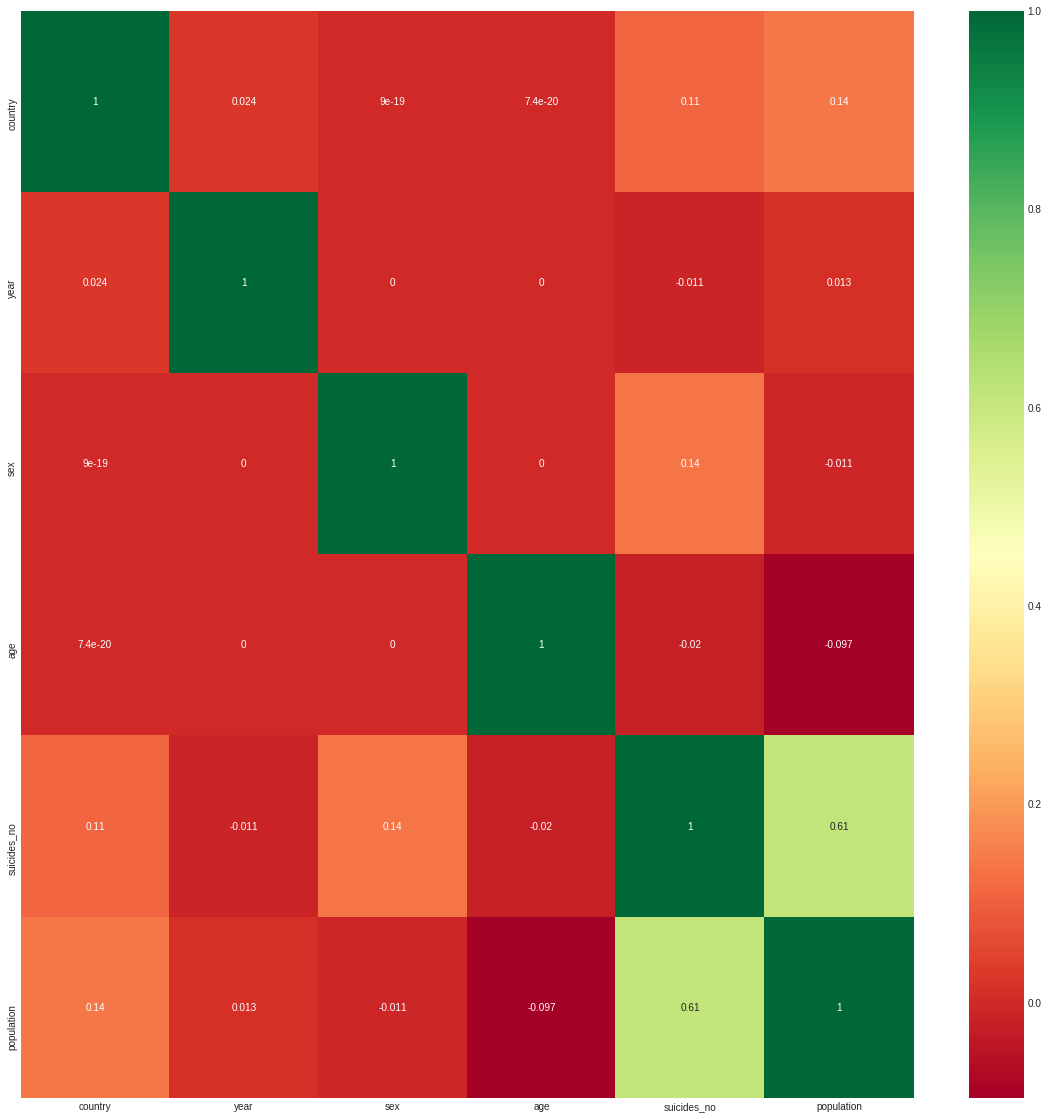

In [27]:
# correlation betwwen the features
plt.style.use('seaborn-dark')
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = bm_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(bm_df[top_corr_features].corr() ,annot=True,cmap="RdYlGn")
plt.show()

## Using pd.get_dummies to encode the country column in the data and using
```python
drop_first = True
```
## to avoid dummy variable trap.

In [28]:
data = pd.get_dummies(data,drop_first = True)

In [29]:
data.head()

,year,sex,suicides_no,population,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,...,country_United States of America,country_Uruguay,country_Uzbekistan,country_Venezuela (Bolivarian Republic of),country_Virgin Islands (USA),age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
6204,1979,0,385.0,12448100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26470,1979,1,217.0,1040500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26471,1979,1,93.0,235800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26469,1979,1,3.0,1191200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27084,1979,0,11.0,281500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.shape

(36060, 126)

## Spliting the data into independant vatiables.

In [31]:
X= data.drop(['suicides_no'],axis=1)
y= data['suicides_no']

bm_X= bm_df.drop(['suicides_no','country'],axis=1)
bm_y= bm_df['suicides_no']

## Splitting the independant variables into test and train

In [32]:
nplace = True# splitting into train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)
bm_x_train, bm_x_test, bm_y_train, bm_y_test = train_test_split(bm_X, bm_y, test_size = 0.2, random_state = 45)

print("Shapes of train data :")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print("Shapes of benchmark data :")
print(bm_x_train.shape)
print(bm_x_test.shape)
print(bm_y_train.shape)
print(bm_y_test.shape)

Shapes of train data :
(28848, 125)
(7212, 125)
(28848,)
(7212,)
Shapes of benchmark data :
(28848, 4)
(7212, 4)
(28848,)
(7212,)


## Standardizing the data by performing scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

bm_x_train = mm.fit_transform(bm_x_train)
bm_x_test = mm.transform(bm_x_test)

X = mm.fit_transform(X)

## Creating a results dataframe which will allow us to compare the results after all the model are trained and evaluated

In [34]:
results = pd.DataFrame(columns = ["model_name","MSE","RMSE","r2_score"])

bm_results = pd.DataFrame(columns = ["model_name","MSE","RMSE","r2_score"])

## Importing all the models that I will be using for the comparison

In [35]:
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor,HistGradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

## Creating and training the above imported model
### The models created in order are :
- Linear Regression
- Losso
- Elastic Net
- SGD Regressor
- Ridge
- Random Forest Regressor
- Ada Boost Regressor
- Gradient Boosting Regressor
- Extra Trees Regressor
- Histogram Gradient Boosting Regressor
- BaggingRegressor
- Decision Tree Regressor
- XGBoost Regressor

### Creating the benchmark model first.


In [36]:
# creating the model
model = DecisionTreeRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(bm_x_train, bm_y_train)

# predicting the test set results
y_pred = model.predict(bm_x_test)

# calculating the mean squared error
mse = np.mean((bm_y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(bm_y_test, y_pred)
print("r2_score :", r2)

bm_results = bm_results.append({"model_name" : "Desicion Tree Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : DecisionTreeRegressor()
MSE : 186797.72826539102
RMSE : 432.2010276079767
r2_score : 0.7539819556531951


In [37]:
# creating the model
model = LinearRegression()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Linear Regression","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : LinearRegression()
MSE : 323457.46742730495
RMSE : 568.7332128751625
r2_score : 0.5739971020805006


In [38]:
# creating the model
model = Lasso()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Losso","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : Lasso()
MSE : 331537.8058447365
RMSE : 575.7931971157149
r2_score : 0.5633550612292721


In [39]:
# creating the model
model = ElasticNet()
print("Model :",model)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Elastic Net","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : ElasticNet()
MSE : 721017.491108395
RMSE : 849.1274881361426
r2_score : 0.050398981028764056


In [40]:
# creating the model
model = SGDRegressor() 
print("Model :",model)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "SGD Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : SGDRegressor()
MSE : 326380.41575274075
RMSE : 571.2971343816987
r2_score : 0.5701474940717273


In [41]:
# creating the model
model = Ridge()
print("Model :",model)
# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Ridge","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : Ridge()
MSE : 323724.0414027539
RMSE : 568.9675222741223
r2_score : 0.5736460163969498


In [42]:
# creating the model
model = RandomForestRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Random Forest Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : RandomForestRegressor()
MSE : 6794.983540141439
RMSE : 82.4316901448796
r2_score : 0.9910508089287934


In [43]:
# creating the model
model = AdaBoostRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Ada Boost Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : AdaBoostRegressor()
MSE : 240161.25723856193
RMSE : 490.06250339988463
r2_score : 0.6837006350004542


In [44]:
# creating the model
model = GradientBoostingRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Gradient Boosting Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : GradientBoostingRegressor()
MSE : 69556.22781878216
RMSE : 263.7351471055425
r2_score : 0.9083924237247376


In [45]:
# creating the model
model = ExtraTreesRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Extra Trees Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : ExtraTreesRegressor()
MSE : 4022.1642775339787
RMSE : 63.42053514070958
r2_score : 0.9947026925927352


In [46]:
# creating the model
model = HistGradientBoostingRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Histogram Gradient Boosting Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : HistGradientBoostingRegressor()
MSE : 16269.177777494273
RMSE : 127.55068709142367
r2_score : 0.9785730193984848


In [47]:
# creating the model
model = BaggingRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Bagging Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : BaggingRegressor()
MSE : 6057.509387132573
RMSE : 77.83000312946527
r2_score : 0.9920220838504122


In [48]:
# creating the model
model = DecisionTreeRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "Desicion Tree Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : DecisionTreeRegressor()
MSE : 10192.253327787022
RMSE : 100.9566903567417
r2_score : 0.986576505750504


In [49]:
# creating the model
model = XGBRegressor()
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

results = results.append({"model_name" : "XGBoost Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

Model : XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
MSE : 8641.591981077905
RMSE : 92.96016340926852
r2_score : 0.9886187718717471


In [50]:
results.head(20)

,model_name,MSE,RMSE,r2_score
0,Linear Regression,323457.467427,568.733213,0.573997
1,Losso,331537.805845,575.793197,0.563355
2,Elastic Net,721017.491108,849.127488,0.050399
3,SGD Regressor,326380.415753,571.297134,0.570147
4,Ridge,323724.041403,568.967522,0.573646
5,Random Forest Regressor,6794.983540,82.431690,0.991051
6,Ada Boost Regressor,240161.257239,490.062503,0.683701
7,Gradient Boosting Regressor,69556.227819,263.735147,0.908392
8,Extra Trees Regressor,4022.164278,63.420535,0.994703
9,Histogram Gradient Boosting Regressor,16269.177777,127.550687,0.978573


In [51]:
results.sort_values(by='r2_score',ascending=False)

,model_name,MSE,RMSE,r2_score
8,Extra Trees Regressor,4022.164278,63.420535,0.994703
10,Bagging Regressor,6057.509387,77.830003,0.992022
5,Random Forest Regressor,6794.983540,82.431690,0.991051
12,XGBoost Regressor,8641.591981,92.960163,0.988619
11,Desicion Tree Regressor,10192.253328,100.956690,0.986577
9,Histogram Gradient Boosting Regressor,16269.177777,127.550687,0.978573
7,Gradient Boosting Regressor,69556.227819,263.735147,0.908392
6,Ada Boost Regressor,240161.257239,490.062503,0.683701
0,Linear Regression,323457.467427,568.733213,0.573997
4,Ridge,323724.041403,568.967522,0.573646


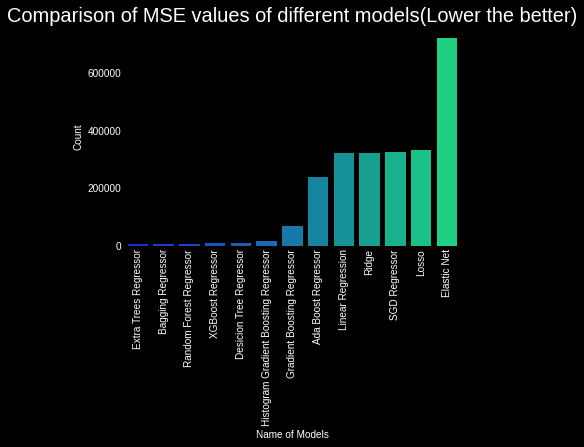

In [52]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
sns.barplot(x = "model_name", y = "MSE" , data = results.sort_values(by = "MSE", ascending = True), palette = 'winter')
plt.title('Comparison of MSE values of different models(Lower the better)', fontsize = 20)
plt.xlabel('Name of Models')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams['font.size'] = 19
plt.show()

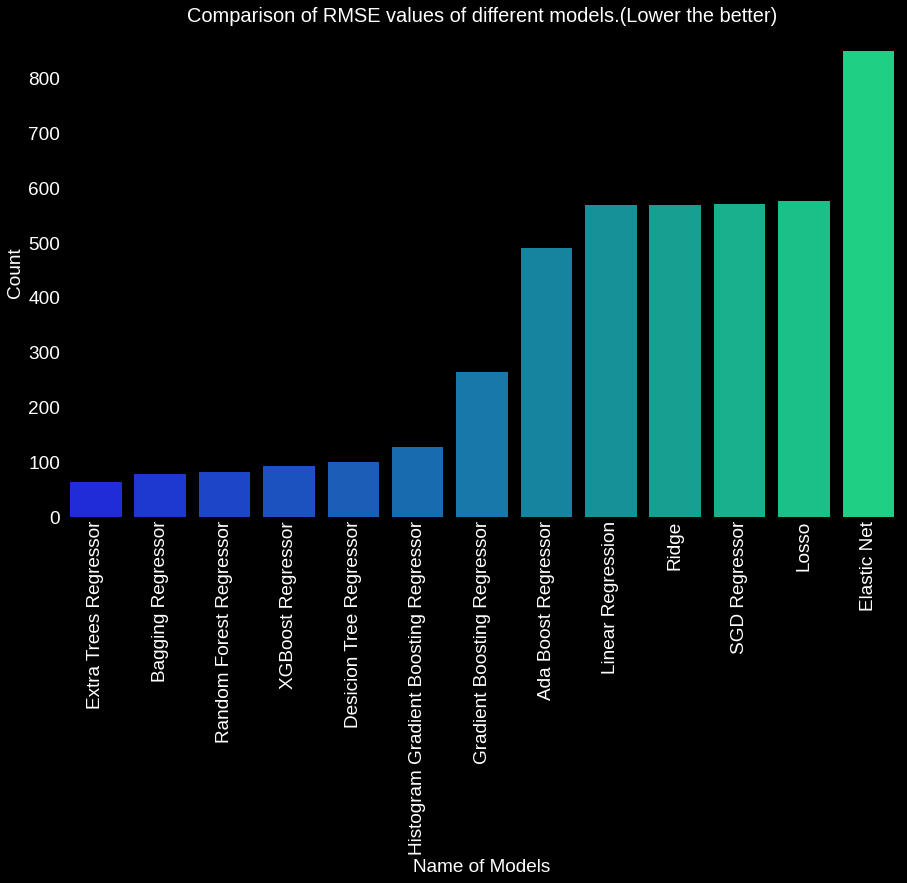

In [53]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
sns.barplot(x = "model_name", y = "RMSE" , data = results.sort_values(by = "RMSE", ascending = True), palette = 'winter')
plt.title('Comparison of RMSE values of different models.(Lower the better)', fontsize = 20)
plt.xlabel('Name of Models')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (15, 9)
plt.show()

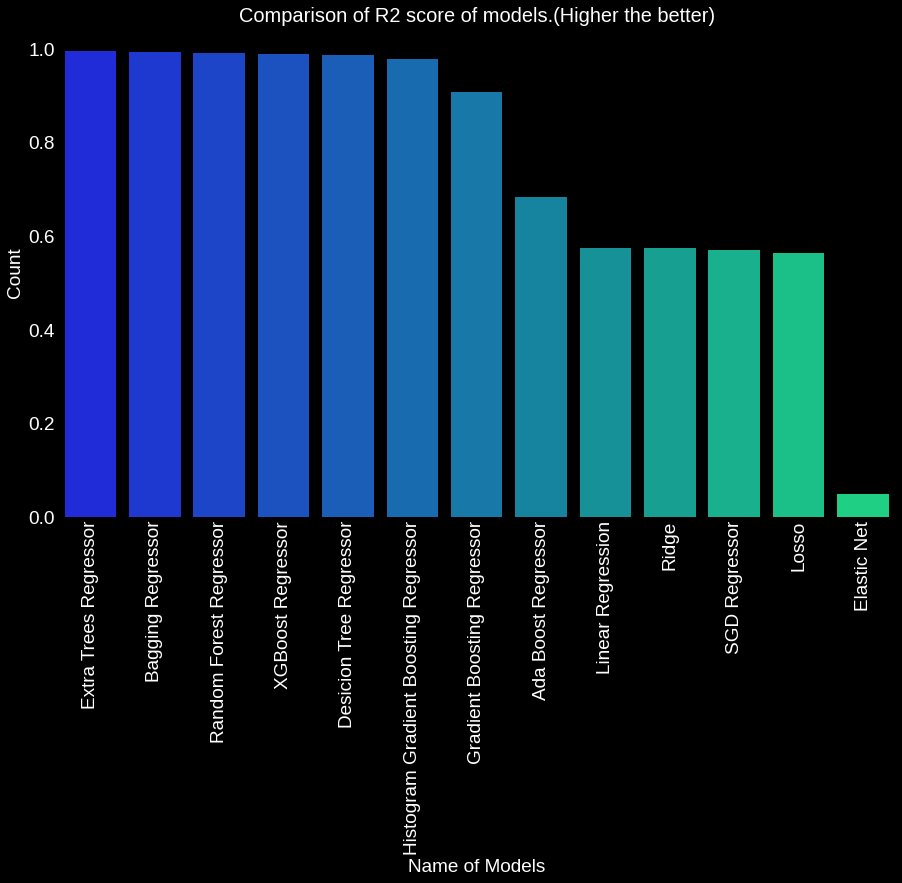

In [54]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
sns.barplot(x = "model_name", y = "r2_score" , data = results.sort_values(by = "r2_score", ascending = False), palette = 'winter')
plt.title('Comparison of R2 score of models.(Higher the better)', fontsize = 20)
plt.xlabel('Name of Models')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (15, 9)
plt.show()

## According to the results we can see that Extra Trees Regressor Performs the best. Now lets try to finetune the hyperparameters

In [55]:
# creating the model
model = ExtraTreesRegressor(n_estimators = 115, n_jobs = 10)
print("Model :",model)

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

Model : ExtraTreesRegressor(n_estimators=115, n_jobs=10)
MSE : 3664.977087266318
RMSE : 60.53905423168021
r2_score : 0.995173118517244


In [56]:
bm_results = bm_results.append({"model_name" : "Tuned Extra Trees Regressor","MSE":mse,"RMSE":rmse,"r2_score":r2},ignore_index=True)

In [57]:
bm_results.head()

,model_name,MSE,RMSE,r2_score
0,Desicion Tree Regressor,186797.728265,432.201028,0.753982
1,Tuned Extra Trees Regressor,3664.977087,60.539054,0.995173


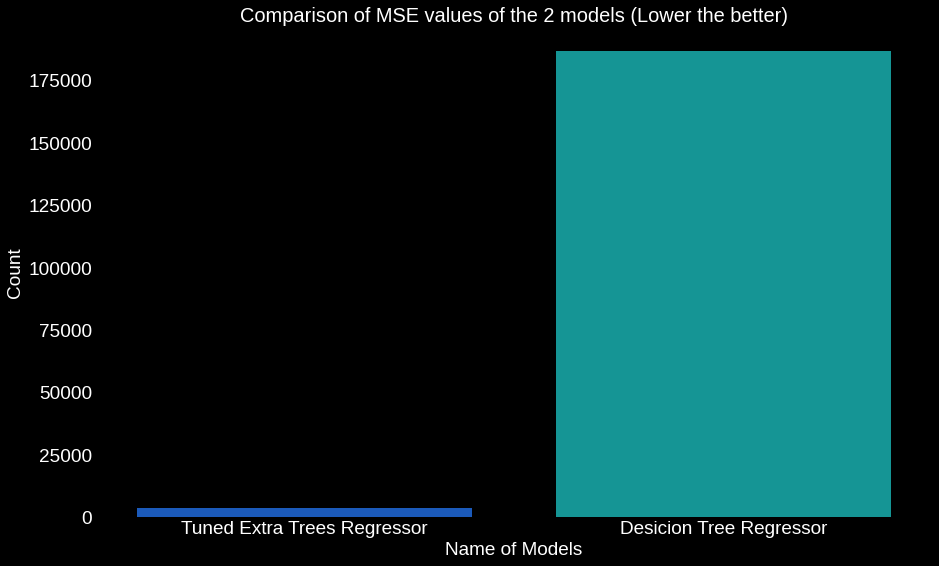

In [58]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
sns.barplot(x = "model_name", y = "MSE" , data = bm_results.sort_values(by = "MSE", ascending = True), palette = 'winter')
plt.title('Comparison of MSE values of the 2 models (Lower the better)', fontsize = 20)
plt.xlabel('Name of Models')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 19
plt.show()

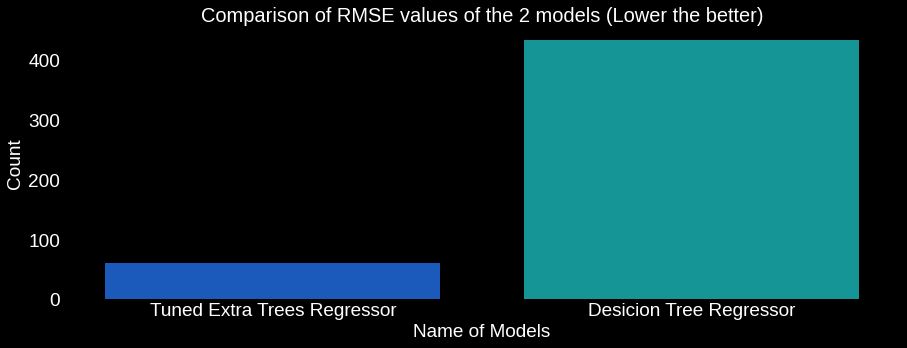

In [59]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
sns.barplot(x = "model_name", y = "RMSE" , data = bm_results.sort_values(by = "RMSE", ascending = True), palette = 'winter')
plt.title('Comparison of RMSE values of the 2 models (Lower the better)', fontsize = 20)
plt.xlabel('Name of Models')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 19
plt.show()

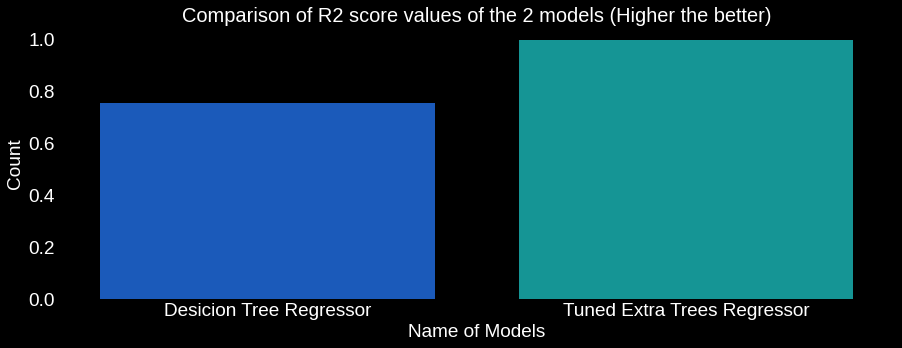

In [60]:
plt.style.use('seaborn-dark')
plt.style.use('dark_background')
sns.barplot(x = "model_name", y = "r2_score" , data = bm_results.sort_values(by = "r2_score", ascending = True), palette = 'winter')
plt.title('Comparison of R2 score values of the 2 models (Higher the better)', fontsize = 20)
plt.xlabel('Name of Models')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 19
plt.show()